In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from utility import *

homedir = get_homedir()

In [2]:
from dtw import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
FIPS_mapping = get_FIPS()
FIPS_full = sorted(FIPS_mapping.keys())

In [4]:
confirmed_cases = pd.read_csv(f"{homedir}/data/us/covid/confirmed_cases.csv")
confirmed_cases.drop(["County Name", "State", "stateFIPS"], axis=1, inplace=True)
confirmed_cases["countyFIPS"]=confirmed_cases["countyFIPS"].apply(correct_FIPS)
confirmed_cases.head()

countyFIPS  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0          0        0        0        0        0        0        0        0   
1      01001        0        0        0        0        0        0        0   
2      01003        0        0        0        0        0        0        0   
3      01005        0        0        0        0        0        0        0   
4      01007        0        0        0        0        0        0        0   

   1/29/20  1/30/20  ...  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  \
0        0        0  ...        0        0        0        0        0   
1        0        0  ...       17       19       19       19       23   
2        0        0  ...       59       66       71       78       87   
3        0        0  ...        9       10       10        9       11   
4        0        0  ...       11       13       16       17       17   

   4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  
0        0        0        0        0        0  
1       25       25       25       25       27  
2       98      102      103      109      114  
3       13       14       15       18       20  
4       19       23       23       26       28  

[5 rows x 90 columns]

In [5]:
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!=0)]
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!=1)]
confirmed_cases.set_index("countyFIPS", inplace=True)
confirmed_cases.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
countyFIPS                                                                  
0                 0        0        0        0        0        0        0   
01001             0        0        0        0        0        0        0   
01003             0        0        0        0        0        0        0   
01005             0        0        0        0        0        0        0   
01007             0        0        0        0        0        0        0   

            1/29/20  1/30/20  1/31/20  ...  4/10/20  4/11/20  4/12/20  \
countyFIPS                             ...                              
0                 0        0        0  ...        0        0        0   
01001             0        0        0  ...       17       19       19   
01003             0        0        0  ...       59       66       71   
01005             0        0        0  ...        9       10       10   
01007             0        0        0  ...       11       13       16   

            4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  
countyFIPS                                                                 
0                 0        0        0        0        0        0        0  
01001            19       23       25       25       25       25       27  
01003            78       87       98      102      103      109      114  
01005             9       11       13       14       15       18       20  
01007            17       17       19       23       23       26       28  

[5 rows x 89 columns]

In [6]:
timeline = confirmed_cases.columns.to_numpy().tolist()
timeline[:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20']

In [7]:
confirmed_cases.rename(columns={i:j for j,i in enumerate(timeline)}, inplace=True)
confirmed_cases.head()

0   1   2   3   4   5   6   7   8   9   ...  79  80  81  82  83  \
countyFIPS                                          ...                       
0            0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
01001        0   0   0   0   0   0   0   0   0   0  ...  17  19  19  19  23   
01003        0   0   0   0   0   0   0   0   0   0  ...  59  66  71  78  87   
01005        0   0   0   0   0   0   0   0   0   0  ...   9  10  10   9  11   
01007        0   0   0   0   0   0   0   0   0   0  ...  11  13  16  17  17   

            84   85   86   87   88  
countyFIPS                          
0            0    0    0    0    0  
01001       25   25   25   25   27  
01003       98  102  103  109  114  
01005       13   14   15   18   20  
01007       19   23   23   26   28  

[5 rows x 89 columns]

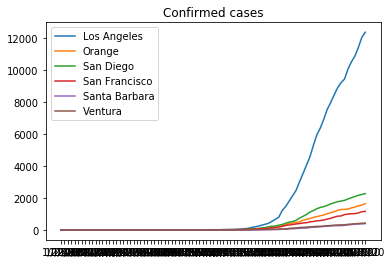

In [8]:
selected_county = {"06037":"Los Angeles", "06059":"Orange", "06073":"San Diego", "06075":"San Francisco", "06083":"Santa Barbara", "06111":"Ventura"}
for fips in selected_county.keys():
    plt.plot(timeline, confirmed_cases.loc[fips], label=selected_county[fips])

plt.legend(loc='upper left')
plt.title("Confirmed cases")
plt.show()

## Redrawn using Plotly

In [9]:
df = pd.read_csv(f"{homedir}/data/us/covid/confirmed_cases.csv")
df.drop(["County Name", "State", "stateFIPS"], axis=1, inplace=True)
df["countyFIPS"] = df["countyFIPS"].apply(correct_FIPS)
df = df[(df["countyFIPS"]!=0)]
df = df[(df["countyFIPS"]!=1)]

tidy_df = df.melt(id_vars="countyFIPS", var_name="date", value_name="confirmed cases")
tidy_df["date"] = pd.to_datetime(tidy_df["date"])
tidy_df.head()

countyFIPS       date  confirmed cases
0          0 2020-01-22                0
1      01001 2020-01-22                0
2      01003 2020-01-22                0
3      01005 2020-01-22                0
4      01007 2020-01-22                0

In [10]:
tidy_df[(tidy_df["countyFIPS"].isin(set(selected_county.keys())))].tail()

countyFIPS       date  confirmed cases
281382      06059 2020-04-19             1636
281389      06073 2020-04-19             2268
281390      06075 2020-04-19             1157
281394      06083 2020-04-19              394
281408      06111 2020-04-19              422

In [11]:
import plotly.express as px

tidy_df_selected = tidy_df[(tidy_df["countyFIPS"].isin(set(selected_county.keys())))]

fig = px.line(tidy_df_selected, x="date", y="confirmed cases", color=tidy_df_selected["countyFIPS"].apply(lambda x: selected_county[x]))
fig.show()

In [12]:
first_day = (tidy_df_selected[(tidy_df_selected["confirmed cases"]>0)].iloc[0])["date"]
first_day

Timestamp('2020-01-26 00:00:00')

## Berkeley dataset

In [13]:
berkeley = pd.read_csv(f'{homedir}/JK/df_county_level_cached.csv')
berkeley["Header-FIPSStandCtyCode"] = berkeley["Header-FIPSStandCtyCode"].apply(correct_FIPS)
berkeley["countyFIPS"] = berkeley["countyFIPS"].apply(correct_FIPS)
berkeley.set_index("Header-FIPSStandCtyCode", inplace=True)
berkeley.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
berkeley.head()

EntityofFile  SecondaryEntityOfFile  DateofFile  \
Header-FIPSStandCtyCode                                                   
01001                           AHRF                   1001        2019   
01003                           AHRF                   1003        2019   
01005                           AHRF                   1005        2019   
01007                           AHRF                   1007        2019   
01009                           AHRF                   1009        2019   

                         DateofCreation  FileLength StateName  \
Header-FIPSStandCtyCode                                         
01001                           19212.0     31661.0   Alabama   
01003                           19212.0     31661.0   Alabama   
01005                           19212.0     31661.0   Alabama   
01007                           19212.0     31661.0   Alabama   
01009                           19212.0     31661.0   Alabama   

                        StateNameAbbreviation CountyName  \
Header-FIPSStandCtyCode                                    
01001                                      AL    Autauga   
01003                                      AL    Baldwin   
01005                                      AL    Barbour   
01007                                      AL       Bibb   
01009                                      AL     Blount   

                        CountyNamew/StateAbbrev  FIPSStateCode  ...  \
Header-FIPSStandCtyCode                                         ...   
01001                               Autauga, AL              1  ...   
01003                               Baldwin, AL              1  ...   
01005                               Barbour, AL              1  ...   
01007                                  Bibb, AL              1  ...   
01009                                Blount, AL              1  ...   

                         Respiratory Mortality  dem_to_rep_ratio #Hospitals  \
Header-FIPSStandCtyCode                                                       
01001                                    81.79          0.326656          1   
01003                                    54.28          0.253255          3   
01005                                    69.82          0.893106          1   
01007                                    84.49          0.278124          1   
01009                                    87.05          0.094317          1   

                         #ICU_beds HeartDiseaseMortality  StrokeMortality  \
Header-FIPSStandCtyCode                                                     
01001                            6                 204.5             56.1   
01003                           51                 183.2             41.9   
01005                            5                 220.4             49.0   
01007                            0                 225.5             57.2   
01009                            6                 224.8             52.8   

                         Smokers_Percentage  FracMale2017  \
Header-FIPSStandCtyCode                                     
01001                             18.081557      0.486578   
01003                             17.489033      0.485472   
01005                             21.999985      0.527701   
01007                             19.114200      0.535469   
01009                             19.208672      0.493114   

                        #FTEHospitalTotal2017  mortality2015-17Estimated  
Header-FIPSStandCtyCode                                                   
01001                                   324.0                  33.194755  
01003                                  2101.0                 148.887537  
01005                                   181.0                  18.483155  
01007                                   145.0                  15.381366  
01009                                   103.0                  48.499442  

[5 rows x 7178 columns]

In [14]:
col_list = pd.read_csv(f"{homedir}/data/us/aggregate_berkeley.csv", index_col=0).columns.to_numpy().tolist()
berkeley = berkeley[col_list].reset_index(drop=True)
berkeley.head()

countyFIPS     State    County  PopulationEstimate2018  \
0      01001  Alabama   Autauga                  55601.0   
1      01003  Alabama   Baldwin                 218022.0   
2      01005  Alabama   Barbour                  24881.0   
3      01007  Alabama      Bibb                  22400.0   
4      01009  Alabama    Blount                  57840.0   

   Population(Persons)2017  PopTotalMale2017  PopTotalFemale2017  \
0                  55504.0           27007.0             28497.0   
1                 212628.0          103225.0            109403.0   
2                  25270.0           13335.0             11935.0   
3                  22668.0           12138.0             10530.0   
4                  58013.0           28607.0             29406.0   

   FracMale2017  PopulationEstimate65+2017  PopulationDensityperSqMile2010  \
0      0.486578                     8392.0                            91.8   
1      0.485472                    42413.0                           114.7   
2      0.527701                     4757.0                            31.0   
3      0.535469                     3632.0                            36.8   
4      0.493114                    10351.0                            88.9   

   ...  3-YrMortalityAge5-14Years2015-17  3-YrMortalityAge15-24Years2015-17  \
0  ...                               0.0                                0.0   
1  ...                               0.0                               23.0   
2  ...                               0.0                                0.0   
3  ...                               0.0                                0.0   
4  ...                               0.0                               10.0   

   3-YrMortalityAge25-34Years2015-17  3-YrMortalityAge35-44Years2015-17  \
0                               10.0                               20.0   
1                               30.0                               52.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                               13.0                               25.0   

   3-YrMortalityAge45-54Years2015-17  3-YrMortalityAge55-64Years2015-17  \
0                               44.0                               73.0   
1                              125.0                              262.0   
2                               21.0                               44.0   
3                               24.0                               37.0   
4                               49.0                               94.0   

   3-YrMortalityAge65-74Years2015-17  3-YrMortalityAge75-84Years2015-17  \
0                              112.0                              143.0   
1                              434.0                              546.0   
2                               65.0                               72.0   
3                               62.0                               56.0   
4                              150.0                              182.0   

   3-YrMortalityAge85+Years2015-17  mortality2015-17Estimated  
0                            109.0                  33.194755  
1                            597.0                 148.887537  
2                             68.0                  18.483155  
3                             45.0                  15.381366  
4                            142.0                  48.499442  

[5 rows x 67 columns]

In [15]:
len(berkeley)

3114

In [16]:
berkeley[['countyFIPS', 'PopTotalMale2017', 'PopTotalFemale2017', 'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010', 'MedicareEnrollment,AgedTot2017', '#Hospitals', '#ICU_beds']].head()

countyFIPS  PopTotalMale2017  PopTotalFemale2017  PopulationEstimate65+2017  \
0      01001           27007.0             28497.0                     8392.0   
1      01003          103225.0            109403.0                    42413.0   
2      01005           13335.0             11935.0                     4757.0   
3      01007           12138.0             10530.0                     3632.0   
4      01009           28607.0             29406.0                    10351.0   

   PopulationDensityperSqMile2010  MedicareEnrollment,AgedTot2017  #Hospitals  \
0                            91.8                          8046.0           1   
1                           114.7                         41590.0           3   
2                            31.0                          4706.0           1   
3                            36.8                          3389.0           1   
4                            88.9                          9542.0           1   

   #ICU_beds  
0          6  
1         51  
2          5  
3          0  
4          6

In [17]:
popularity_type= ['PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010']
popularity_type_Male = popularity_type[::2]
popularity_type_Fmle = popularity_type[1::2]
motality_type = ['3-YrMortalityAge<1Year2015-17',
       '3-YrMortalityAge1-4Years2015-17', '3-YrMortalityAge5-14Years2015-17',
       '3-YrMortalityAge15-24Years2015-17',
       '3-YrMortalityAge25-34Years2015-17',
       '3-YrMortalityAge35-44Years2015-17',
       '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Years2015-17',
       '3-YrMortalityAge65-74Years2015-17',
       '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17']
berkeley_tidy = berkeley.melt(id_vars="countyFIPS", value_vars=popularity_type_Male, var_name='', value_name='PopMale2010')
berkeley_tidy.head()

countyFIPS                 PopMale2010
0      01001  PopMale<52010       1866.0
1      01003  PopMale<52010       5614.0
2      01005  PopMale<52010        847.0
3      01007  PopMale<52010        712.0
4      01009  PopMale<52010       1805.0

## Geography

In [18]:
raw_neighbor_counties = pd.read_csv(f"{homedir}/data/us/geolocation/neighborcounties.csv")
raw_neighbor_counties['orgfips'] = raw_neighbor_counties['orgfips'].apply(correct_FIPS)
raw_neighbor_counties['adjfips'] = raw_neighbor_counties['adjfips'].apply(correct_FIPS)
raw_neighbor_counties.head()

orgfips adjfips  instate
0   01001   01021        1
1   01001   01047        1
2   01001   01051        1
3   01001   01085        1
4   01001   01101        1

In [19]:
# NOTE: df[["col1", "col2"]] does not actually copy data itself, just creates a separate view (i.e. like reference)
county_edges = list(raw_neighbor_counties[["orgfips","adjfips"]].to_records(index=False))
G = nx.Graph()

# Note: Try to add nodes in order first, for visualization purposes later
G.add_nodes_from(FIPS_full)
G.add_edges_from(county_edges)

# Ignore AK, HI for visual issue
for fips in FIPS_full:
    if fips[:2]=='02' or fips[:2]=='15':
        G.remove_node(fips)

In [52]:
raw_county_centers = pd.read_csv(f"{homedir}/data/us/geolocation/county_centers.csv")
raw_county_centers['fips'] = raw_county_centers['fips'].apply(correct_FIPS)
raw_county_centers = raw_county_centers[['fips','clon10', 'clat10']].dropna()

location_dictionary = dict(zip(raw_county_centers['fips'].to_list(), list(raw_county_centers[['clon10', 'clat10']].to_numpy())))

counter = 0
lowerleft = [raw_county_centers['clon10'].min(), raw_county_centers['clat10'].min()]
county_removal = []
for fips in G.nodes:
    if fips not in location_dictionary.keys():
        # location_dictionary[fips] = [lowerleft[0]+0.5*counter, lowerleft[1]]
        # counter += 1
        county_removal.append(fips)
for fips in county_removal:
    G.remove_node(fips)

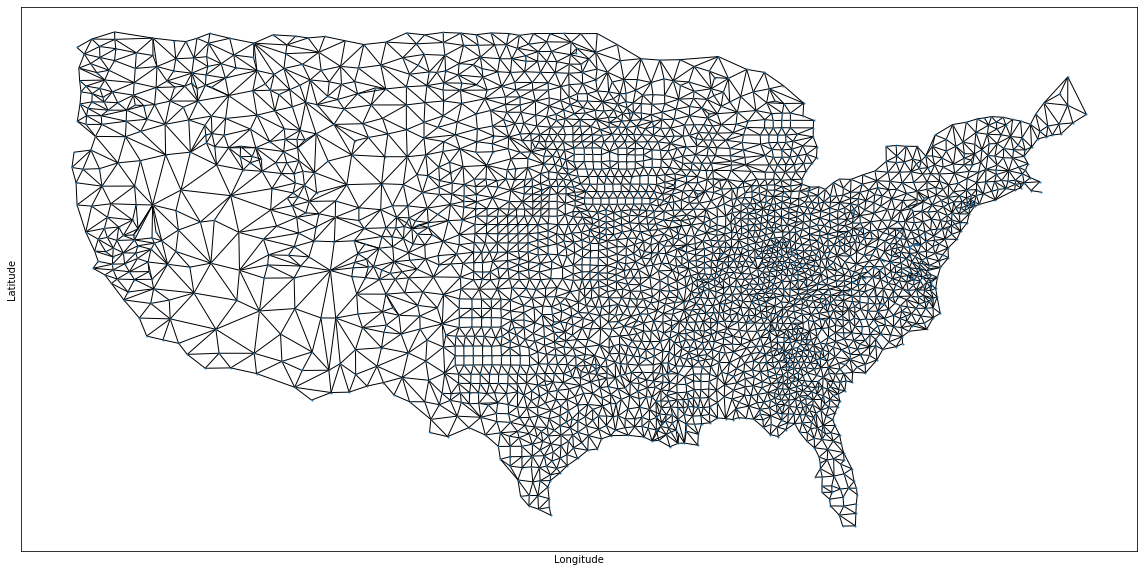

In [53]:
plt.figure(figsize=(20,10))
nx.drawing.nx_pylab.draw_networkx(
        G, 
        pos=location_dictionary,
        node_size=1,
        with_labels=False)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [22]:
# berkeley["NeighborCounties"] = berkeley["countyFIPS"].apply(lambda x: list(G.neighbors(x)))
# berkeley.head()

## Clustering

In [23]:
from sklearn.cluster import MiniBatchKMeans

kNNdata = pd.DataFrame()
kNNdata['PopRatioMale2017'] = berkeley['PopTotalMale2017'] / (berkeley['PopTotalMale2017']+berkeley['PopTotalFemale2017'])
kNNdata['PopRatio65+2017'] = berkeley['PopulationEstimate65+2017'] / (berkeley['PopTotalMale2017']+berkeley['PopTotalFemale2017'])
kNNdata['PopulationDensityperSqMile2010'] = berkeley['PopulationDensityperSqMile2010'] / 260
kNNdata['MedicareEnrollment,AgedTot2017'] = berkeley['MedicareEnrollment,AgedTot2017'] / (berkeley['PopTotalMale2017']+berkeley['PopTotalFemale2017'])
kNNdata['#Hospitals'] = 20000 * berkeley['#Hospitals'] / (berkeley['PopTotalMale2017']+berkeley['PopTotalFemale2017'])
kNNdata['#ICU_beds'] = 10000 * berkeley['#ICU_beds'] / (berkeley['PopTotalMale2017']+berkeley['PopTotalFemale2017'])

X = kNNdata.to_numpy()
kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X)
kmeans.cluster_centers_

array([[5.03409825e-01, 1.88809933e-01, 4.38012750e-01, 1.80314203e-01,
        4.41091525e-01, 6.19089624e-01],
       [4.84960867e-01, 1.40323486e-01, 8.52010769e+01, 1.21525086e-01,
        8.33484109e-02, 8.71899482e-01],
       [4.91711020e-01, 1.75109847e-01, 2.02293913e+00, 1.71176619e-01,
        5.69492166e-01, 4.69069398e+00],
       [5.00638227e-01, 2.48808184e-01, 1.28571429e-02, 2.34183884e-01,
        9.48675793e+00, 0.00000000e+00],
       [5.06718502e-01, 2.07967685e-01, 4.57810912e-02, 1.99864930e-01,
        3.25132294e+00, 6.58750824e-03]])

In [24]:
kmeans.predict(kNNdata.iloc[1].to_numpy().reshape(1,-1))

array([0])

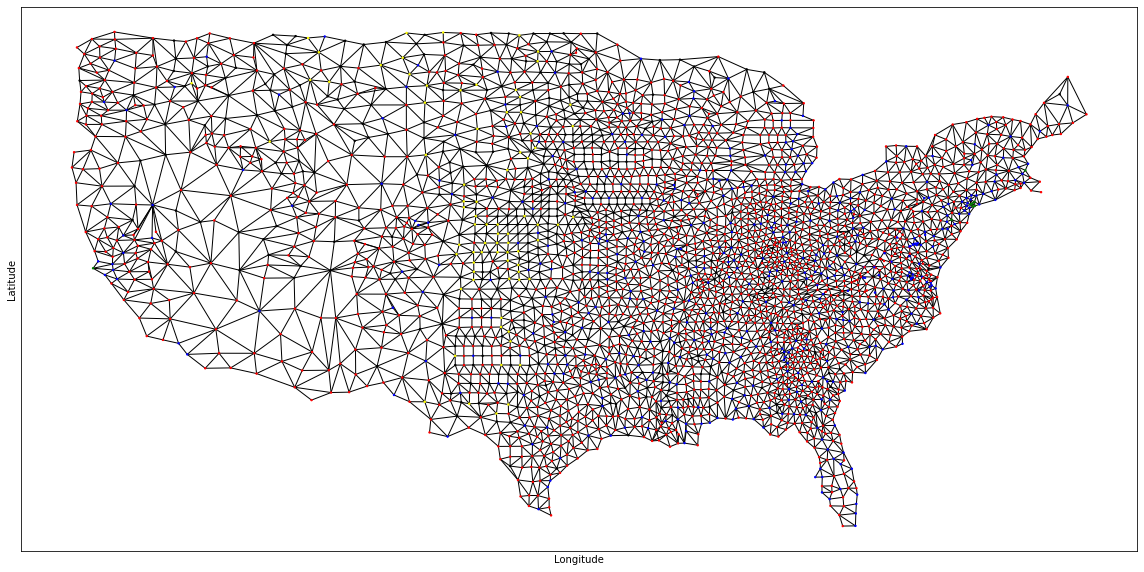

In [55]:
kNNdata_wFIPS = kNNdata.join(berkeley['countyFIPS'])
classes = []
for fips in G.nodes:
    if len(kNNdata_wFIPS[kNNdata_wFIPS['countyFIPS']==fips])==1:
        classes.append(kmeans.predict((kNNdata_wFIPS[kNNdata_wFIPS['countyFIPS']==fips].iloc[0]).to_numpy()[:-1].reshape(1,-1))[0])
    else:
        classes.append(4)
# [kmeans.predict(kNNdata.iloc[i].to_numpy().reshape(1,-1))[0] for i in range(len(kNNdata))]
colormap_nodes = []
colormap_str = ['red', 'green', 'blue', 'yellow', 'black']
for i in classes:
     colormap_nodes.append(colormap_str[i])

plt.figure(figsize=(20,10))
nx.drawing.nx_pylab.draw_networkx(
        G, 
        pos=location_dictionary,
        node_size=2,
        node_color=colormap_nodes,
        with_labels=False)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [56]:
print(classes.count(0), classes.count(1), classes.count(2), classes.count(3), classes.count(4))

2124 8 496 77 404


In [57]:
minclass = 0
for i in range(5):
    if classes.count(minclass)>classes.count(i):
        minclass = i

fips_to_county_name = pd.read_csv(f"{homedir}/data/us/processing_data/fips_key.csv", encoding='latin-1')
fips_to_county_name['FIPS'] = fips_to_county_name['FIPS'].apply(correct_FIPS)
dum = []
for i, c in enumerate(classes):
    if c==minclass: 
        print(kNNdata_wFIPS.iloc[i]['countyFIPS'])
        dum.append(kNNdata_wFIPS.iloc[i]['countyFIPS'])
for fips in dum:
    print(fips_to_county_name[fips_to_county_name['FIPS']==fips]['COUNTY'].iloc[0])

06069
25011
34003
35053
36033
36047
36067
42087
San Benito County
Franklin County
Bergen County
Socorro County
Franklin County
Kings County
Onondaga County
Mifflin County


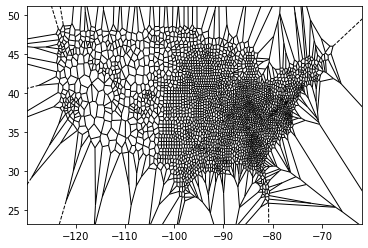

In [62]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.asarray([location_dictionary[fips] for fips in G.nodes])
vor = Voronoi(points)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, figsize=(20,10))
plt.show()

In [43]:
from sklearn.cluster import Birch

brc = Birch(threshold=0.3, n_clusters=5)
brc.fit(X)
brc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

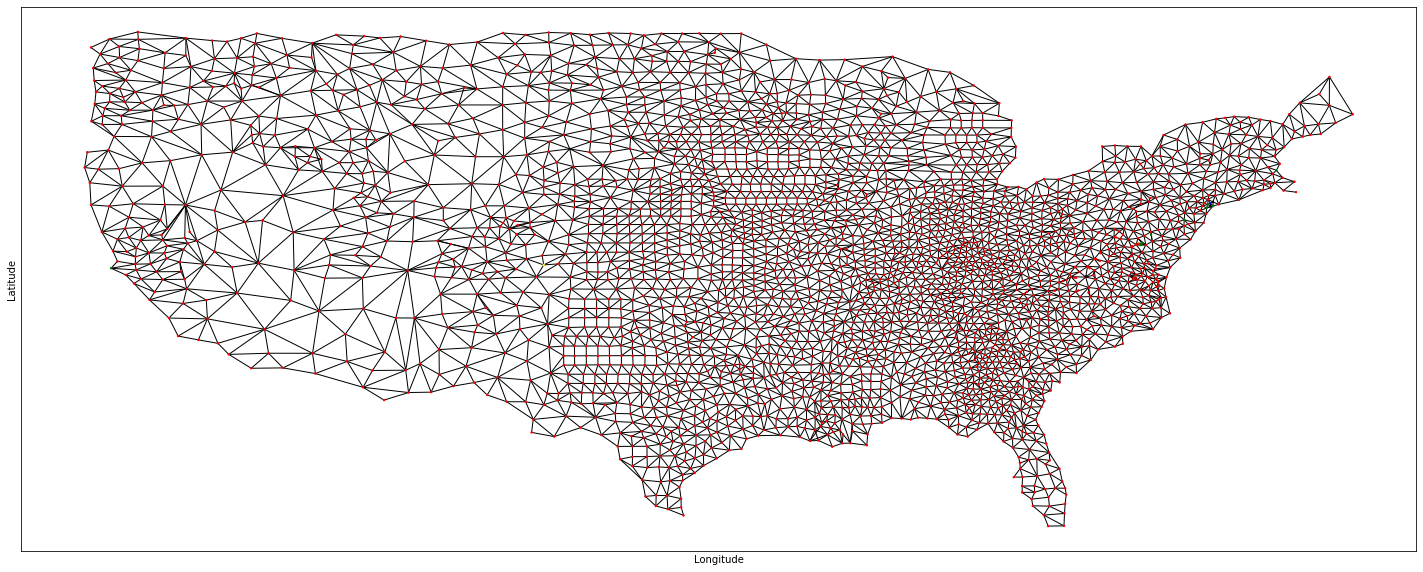

In [64]:
classes_brc = []
for fips in G.nodes:
    if len(kNNdata_wFIPS[kNNdata_wFIPS['countyFIPS']==fips])==1:
        classes_brc.append(brc.predict((kNNdata_wFIPS[kNNdata_wFIPS['countyFIPS']==fips].iloc[0]).to_numpy()[:-1].reshape(1,-1))[0])
    else:
        classes_brc.append(4)
# [kmeans.predict(kNNdata.iloc[i].to_numpy().reshape(1,-1))[0] for i in range(len(kNNdata))]
colormap_nodes_brc = []
for i in classes_brc:
     colormap_nodes_brc.append(colormap_str[i])

plt.figure(figsize=(25,10))
nx.drawing.nx_pylab.draw_networkx(
        G, 
        pos=location_dictionary,
        node_size=2,
        node_color=colormap_nodes_brc,
        with_labels=False)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [45]:
minclass = 0
for i in range(5):
    if classes_brc.count(minclass)>classes_brc.count(i):
        minclass = i

dum = []
for i, c in enumerate(classes_brc):
    if c==minclass: 
        print(kNNdata_wFIPS.iloc[i]['countyFIPS'])
        dum.append(kNNdata_wFIPS.iloc[i]['countyFIPS'])
for fips in dum:
    print(fips_to_county_name[fips_to_county_name['FIPS']==fips]['COUNTY'].iloc[0])

36047
Kings County


In [46]:
print(classes_brc.count(0), classes_brc.count(1), classes_brc.count(2), classes_brc.count(3), classes_brc.count(4))

3093 10 1 1 88
